In [18]:
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

torch.__version__

'1.8.2+cpu'

In [19]:
model = torchvision.models.densenet161(pretrained=True)
model.eval()

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [20]:
for name, module in model.named_modules():
    print(f'{name} // {module}')

 // DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        

In [21]:
class customimage(Dataset):
    def __init__(self):
        super(customimage, self).__init__()
        self.transform = transforms.Compose([
                                            transforms.Resize(224),
                                            transforms.ToTensor(),
                                            transforms.Normalize(
                                                mean=[0.485, 0.456, 0.406],
                                                std=[0.229, 0.224, 0.225])
                                            ])
    def __call__(self, input_img):
        img = Image.open(input_img)
        img = img.convert('RGB')
        return self.transform(img)

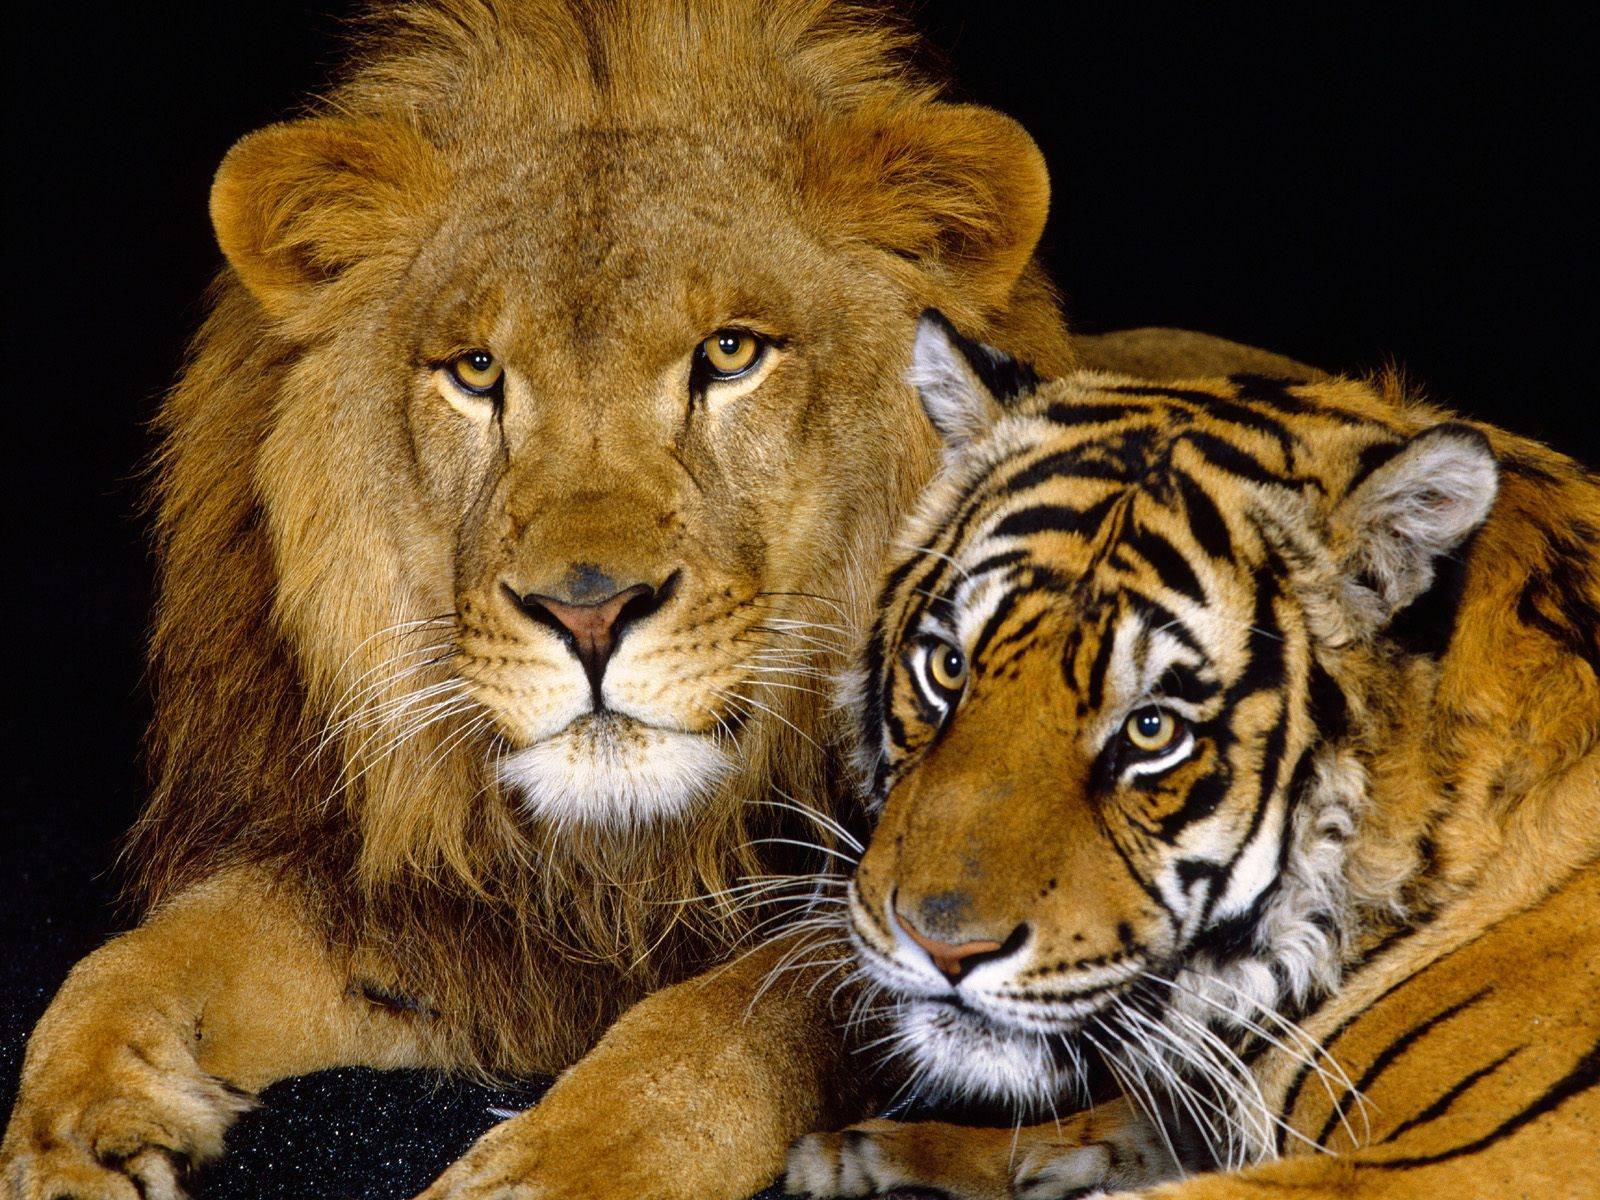

In [22]:
image_path = 'C:\\Users\\hjm01\\Desktop\\AI_winter\\test\\lion_tiger.jpg'
Image.open(image_path)

In [23]:
image_trans = customimage()
input_img = image_trans(image_path)
input_img = input_img.unsqueeze(dim=0)

In [24]:
print(model(input_img)) #라벨에 대한 확률

tensor([[-6.7368e-01,  2.7190e-01,  1.3851e-02,  4.0174e-01, -7.2422e-01,
         -6.5160e-01, -1.5997e+00,  1.5779e-01, -2.6615e-01, -1.6003e+00,
          6.9102e-01,  8.5536e-01, -1.1137e-01, -2.2795e-01,  3.3837e-02,
         -4.8546e-01, -1.5921e+00, -4.4440e-01,  2.4515e-01, -1.1569e+00,
         -5.5949e-01, -6.0254e-03, -1.8646e-02,  4.8020e-01,  6.3231e-01,
          3.9113e-01,  6.7071e-02, -4.1062e-01,  1.3952e+00, -3.3036e-01,
          2.2856e-01, -1.0698e+00,  4.5077e-01, -6.1960e-02,  9.2377e-02,
          5.9014e-01,  9.5736e-01,  3.0825e-01, -6.9626e-02,  7.6607e-01,
         -4.1313e-01,  1.1189e+00, -7.0172e-01,  1.0278e+00, -1.8786e-01,
         -2.2632e-01, -8.3216e-01,  5.1773e-01, -4.2602e-01, -1.4899e-01,
          7.2791e-01,  1.0347e+00, -2.7320e-01,  4.8299e-02,  5.1501e-01,
         -9.4427e-03,  7.2549e-01, -6.5838e-01,  9.3421e-02,  1.2239e+00,
          1.7050e+00,  8.4918e-01,  1.3321e+00,  3.0811e-01,  5.0213e-01,
          4.1197e-01,  7.6575e-01,  1.

In [25]:
result = torch.argmax(model(input_img))
print(result, model(input_img)[0][result])

tensor(291) tensor(9.3008, grad_fn=<SelectBackward>)


In [26]:
result_two = model(input_img)
result_two[0][result] = -999.
result2 = torch.argmax(result_two)
print(result2,result_two[0][result2])

tensor(292) tensor(8.0890, grad_fn=<SelectBackward>)


In [27]:
class GradCAM():
    def __init__(self, model):
        super(GradCAM, self).__init__()
        self.model = model
        self.model.eval()
    
    def forward_hook(self, name): #양식을 맞춰주기 위해서 이중구조
        def save_forward_hook(module, _, output):
            self.forward_out[name] = output.detach()
        return save_forward_hook

    def backward_hook(self, name):
        def save_backward_hook(module, _, grad_output):
            self.backward_out[name] = grad_output[0].detach()
        return save_backward_hook
    
    def get_gradient(self, input_tensorimage, target_layer, target_label=None):
        self.model.zero_grad() #그레디언트 초기화
        self.forward_out = {}
        self.backward_out = {}
        self.handlers = []
        self.gradients = []
        self.gradient_min_max = []
        self.target_layer = target_layer
        
        for name, module in self.model.named_modules():
            if name == self.target_layer:
#                 self.handlers.append(module.register_forward_hook(self.forward_hook(name)))
#                 self.handlers.append(module.register_backward_hook(self.backward_hook(name)))
                self.handlers.append(module.register_forward_hook(self.forward_hook(name)))
                self.handlers.append(module.register_full_backward_hook(self.backward_hook(name)))
                
        output = self.model(input_tensorimage)
        target_tensor = torch.zeros_like(output)
        if target_label is None:            
            target_tensor[0][int(torch.argmax(output))] = 1.
        else:
            target_tensor[0][target_label] = 1.  
        
        output.backward(target_tensor)
        
        grads = self.backward_out[self.target_layer]
        weight = torch._adaptive_avg_pool2d(grads, 1)
        CAM = self.forward_out[self.target_layer] * weight
        CAM = CAM.sum(dim=1, keepdim=True)
        CAM = F.relu(CAM)
        
        self.model.zero_grad()
        for handle in self.handlers:
            handle.remove()
            
        return CAM
    
    def visualize(self, CAM, input_image):
        original_w, original_h = input_image.size[0], input_image.size[1]
        gradmap = F.interpolate(CAM, (original_h, original_w), mode='bicubic', align_corners=False)
        gradmap = torch.squeeze(gradmap)
        plt.figure(figsize=(original_h, original_w), dpi=1)

        plt.imshow(input_image)
        plt.imshow(gradmap, cmap='jet', alpha=0.5)
        
        plt.axis('off')
        plt.tight_layout()
        plt.show()           
        

In [28]:
GC = GradCAM(model)

In [29]:
GC_grad = GC.get_gradient(input_tensorimage=input_img, target_layer='features.denseblock4.denselayer24.conv2', target_label=result)

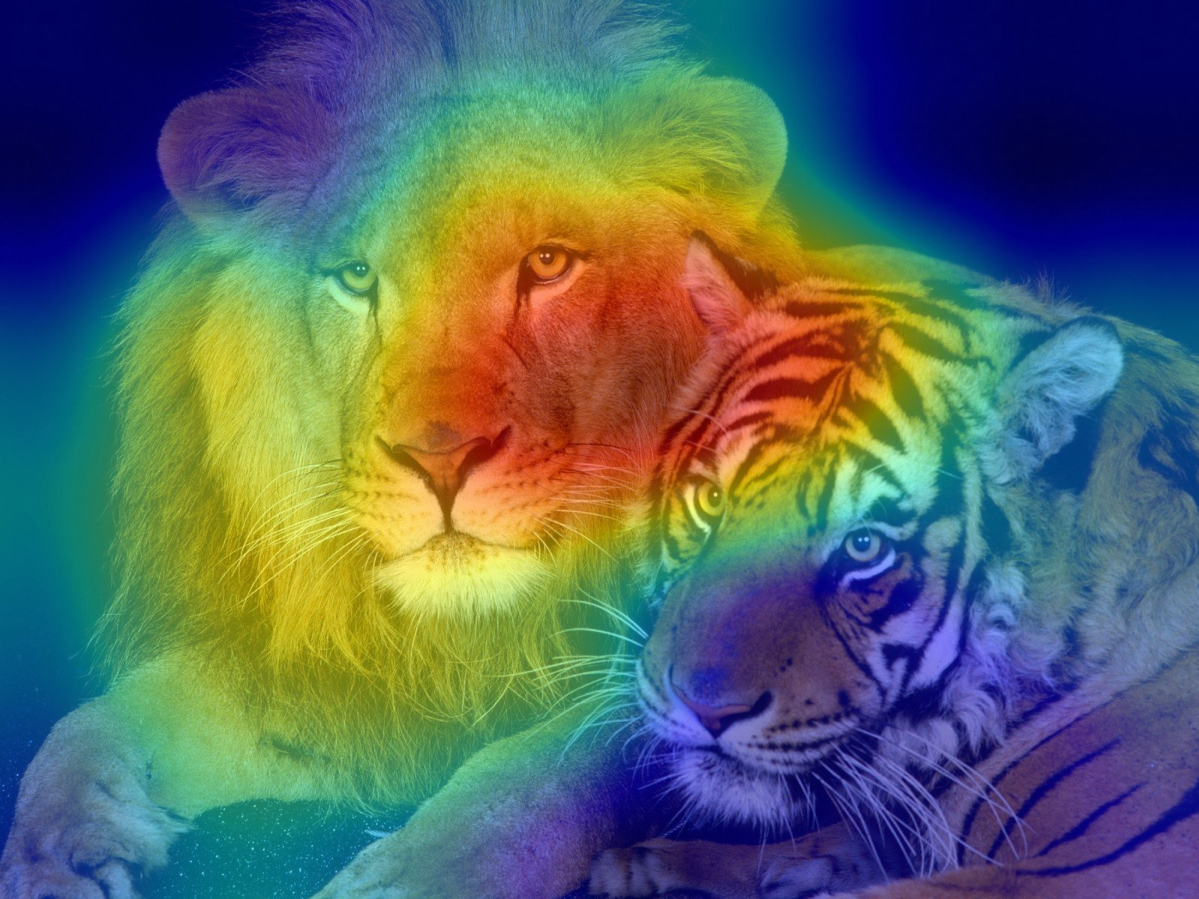

In [30]:
GC_vis = GC.visualize(GC_grad, input_image = Image.open(image_path))

In [31]:
GC_grad2 = GC.get_gradient(input_tensorimage=input_img, target_layer='features.denseblock4.denselayer24.conv2', target_label=result2)

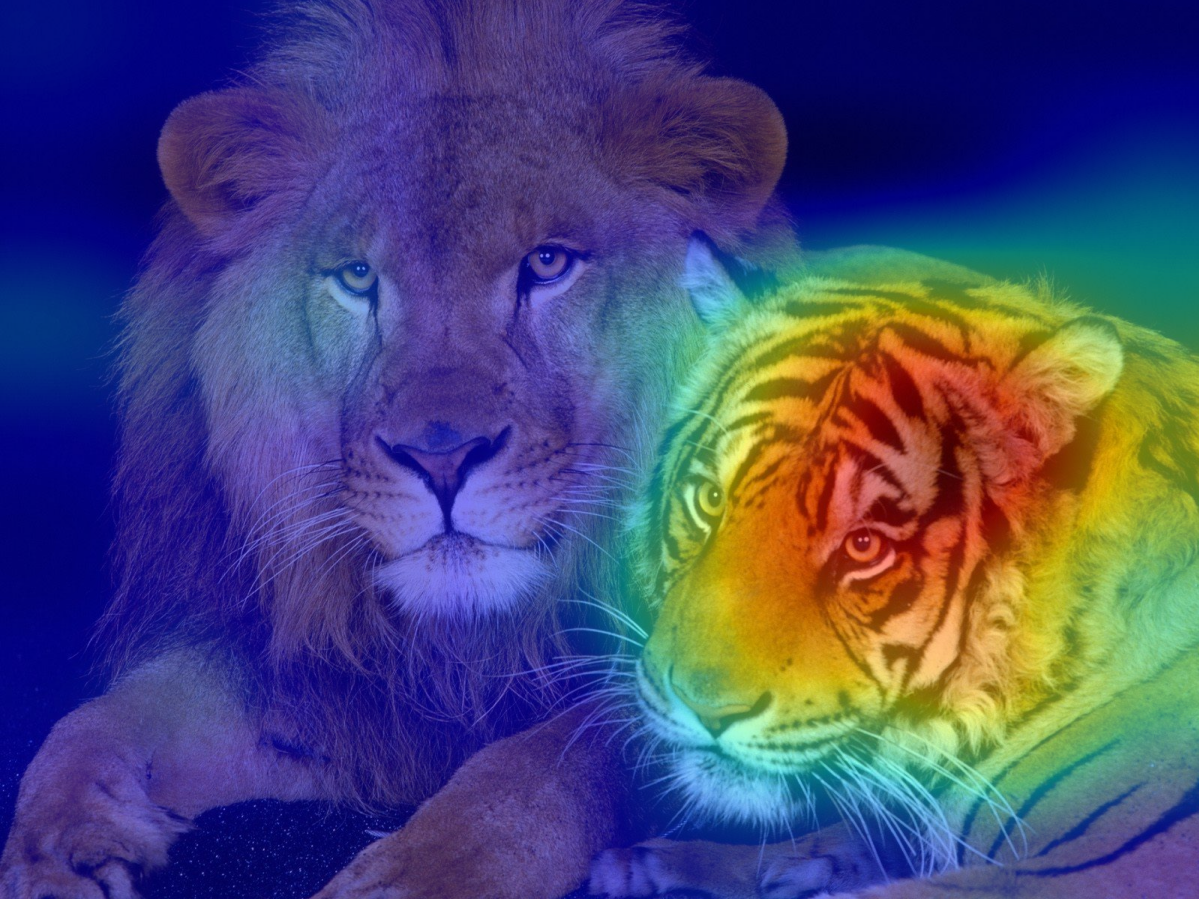

In [32]:
GC_vis2 = GC.visualize(GC_grad2, input_image = Image.open(image_path))